In [12]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import PuOr
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

from pycebox.ice import ice, ice_plot
import pandas as pd
df = pd.read_csv("D:\dataset\Bike-Sharing-Dataset\day.csv")

Automatically created module for IPython interactive environment


In [13]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [15]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [39]:
data_X={'season': df.season, 'temperature': df.temp, 'windspeed':df.windspeed, 'weekday':df.weekday, 'workingday':df.workingday}
X = pd.DataFrame(data=data_X)

y = df.cnt

y -= y.mean() # substract mean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)

In [51]:
X.columns

Index(['season', 'temperature', 'windspeed', 'weekday', 'workingday'], dtype='object')

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 720x576 with 0 Axes>

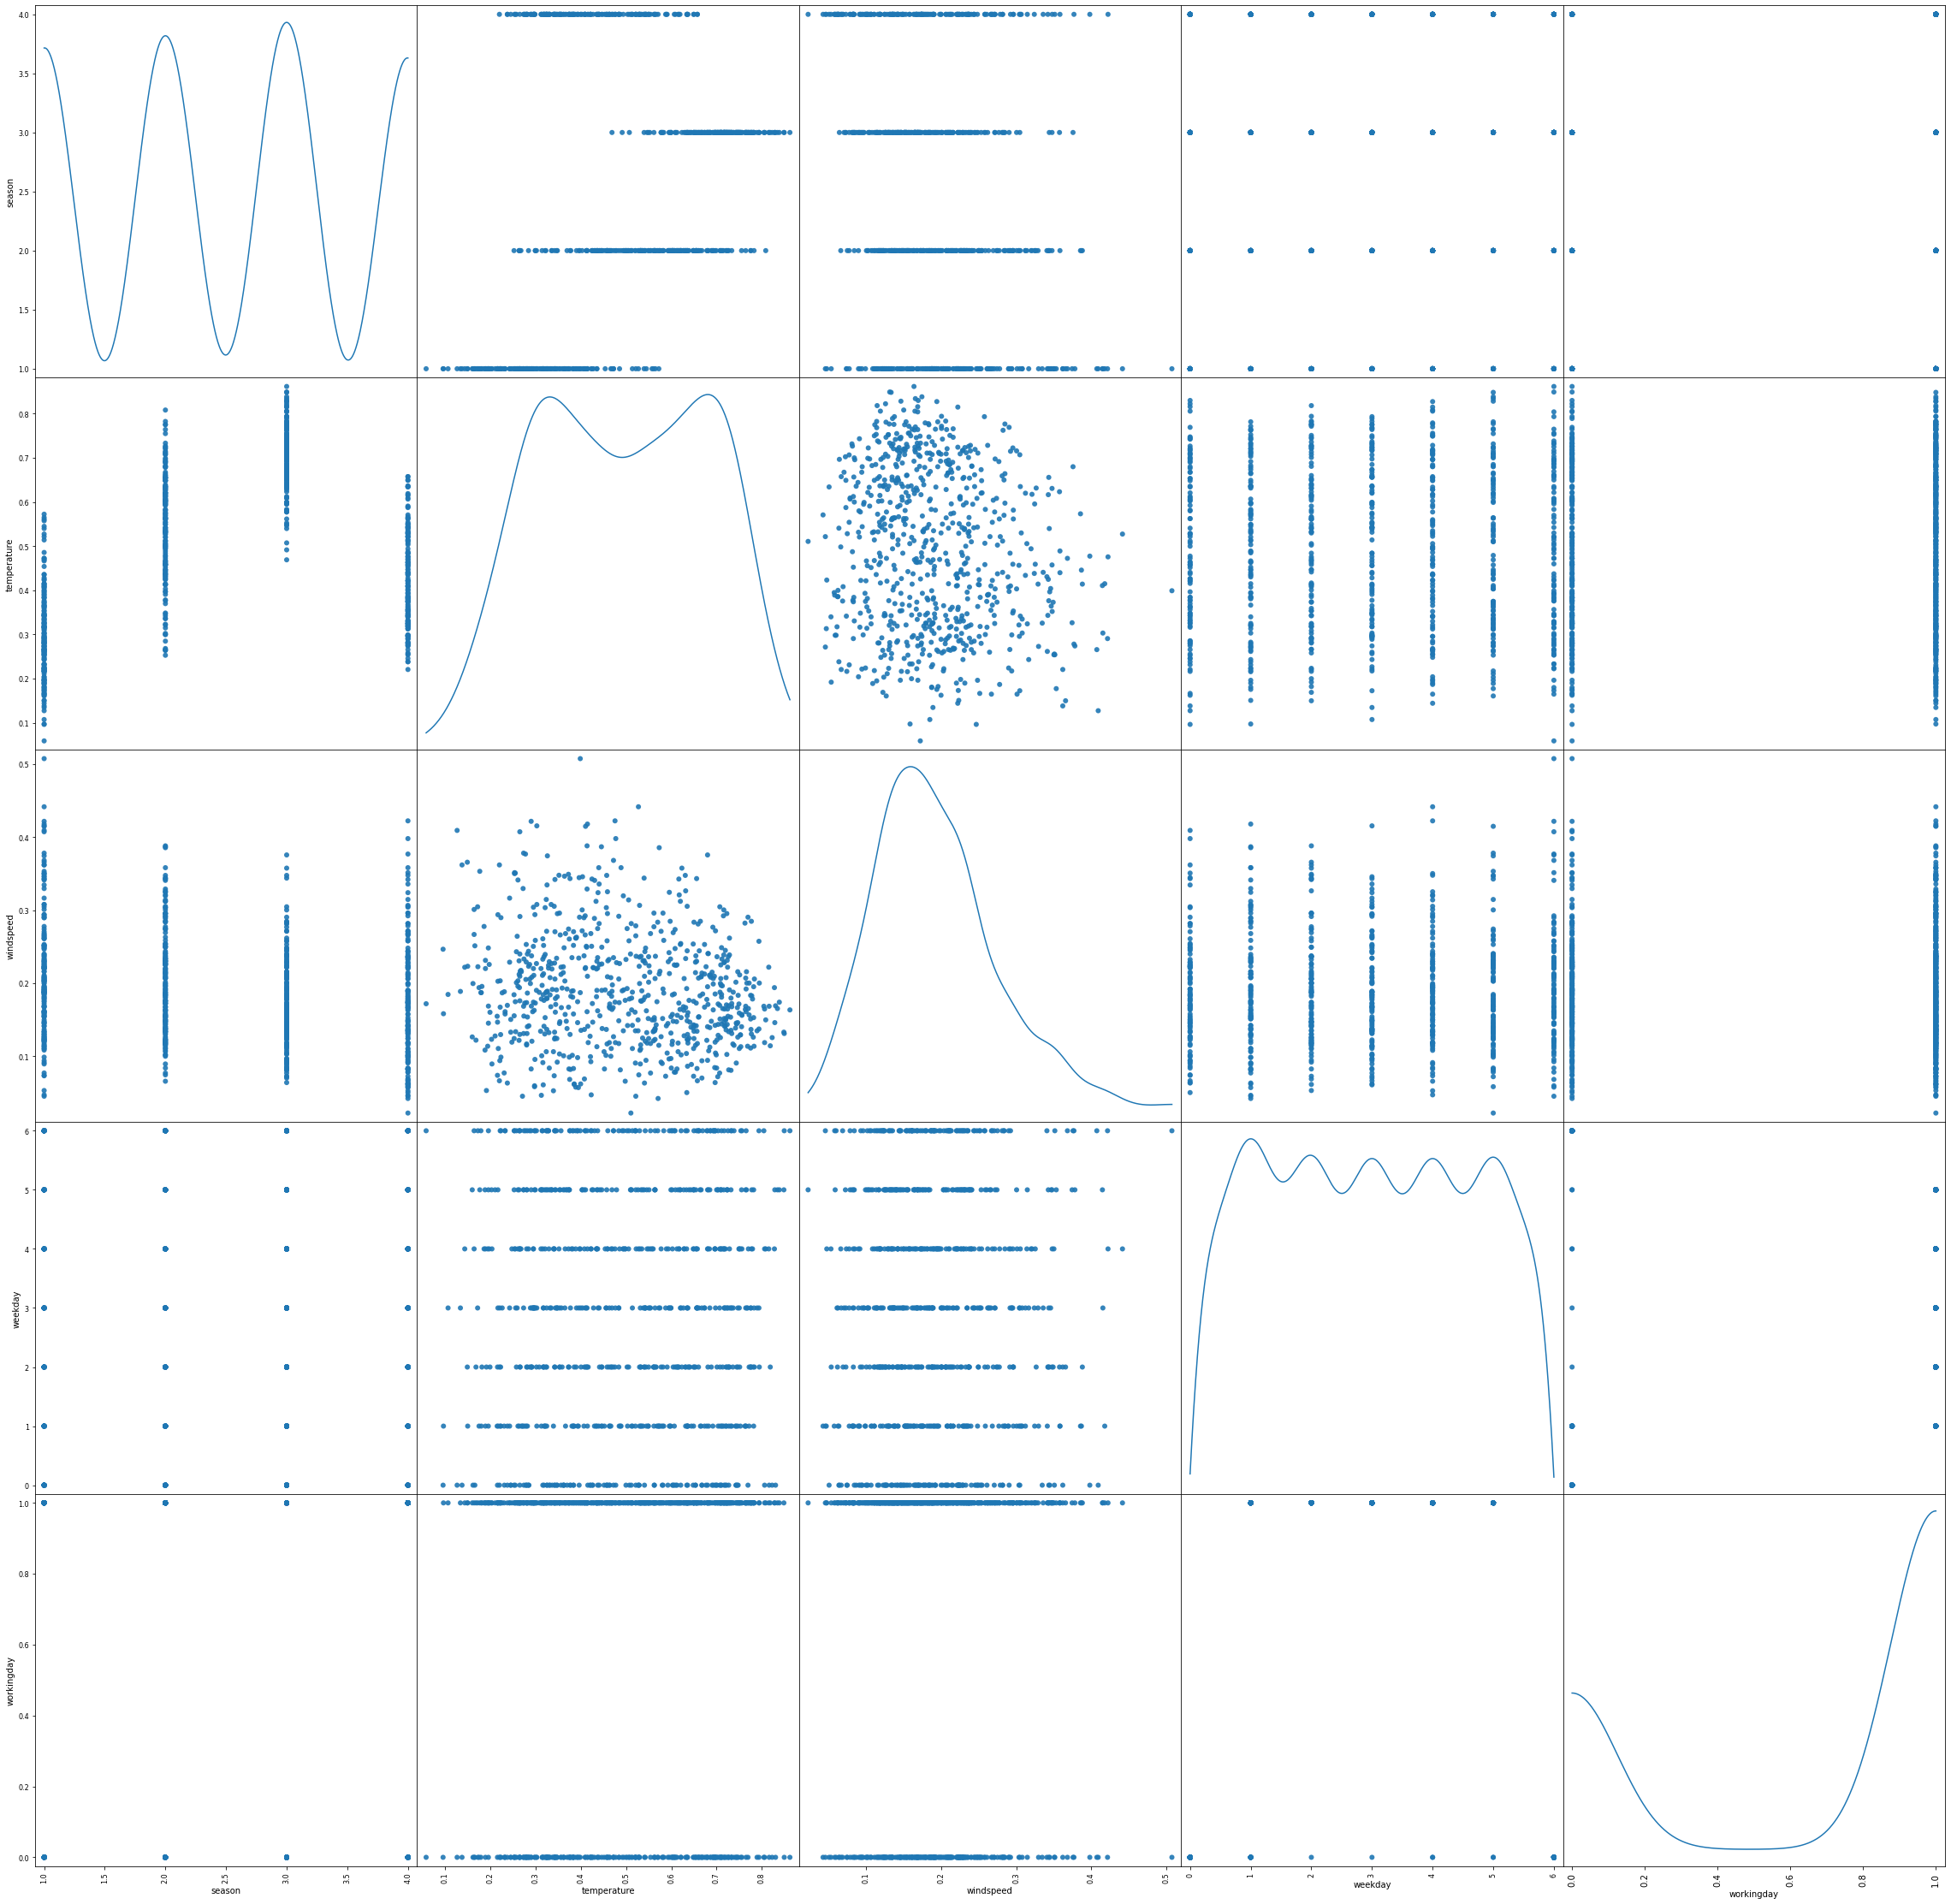

In [41]:
fig = plt.figure()
pd.plotting.scatter_matrix(X,figsize =(40,40),alpha=0.9,diagonal="kde",marker="o");
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

In [42]:
print("Training GradientBoostingRegressor...")
tic = time()
est = HistGradientBoostingRegressor()
est.fit(X_train, y_train)
print("done in {:.2f}s".format(time() - tic))
print("Test R2 score: {:.2f}".format(est.score(X_test, y_test)))

Training GradientBoostingRegressor...
done in 0.30s
Test R2 score: 0.42


Computing partial dependence plots...
done in 2.583s


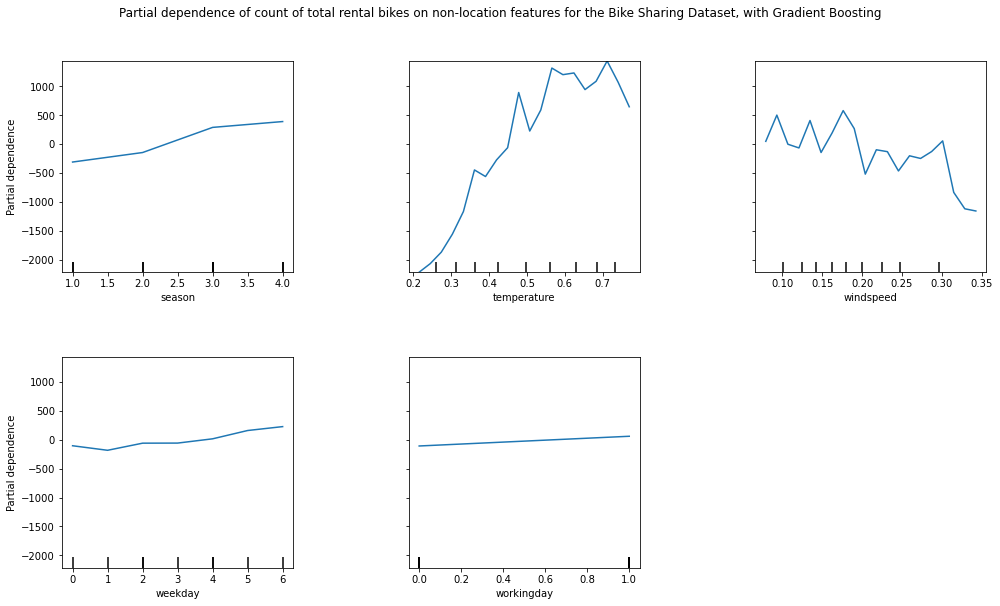

In [70]:
print('Computing partial dependence plots...')
tic = time()
features = ['season', 'temperature', 'windspeed', 'weekday', 'workingday']
plot_partial_dependence(est, X_train, features,
                        n_jobs=3, grid_resolution=20)
print("done in {:.3f}s".format(time() - tic))
fig = plt.gcf()
fig.set_size_inches(14, 9)
fig.suptitle('Partial dependence of count of total rental bikes on non-location features for the Bike Sharing Dataset, with Gradient Boosting')
fig.subplots_adjust(wspace=0.5, hspace=0.4)
fig.tight_layout(rect=[0, 0.05, 1, 0.95])

In [45]:
ice_df = ice(data = X_train, column = 'temperature', predict = est.predict, num_grid_points=10)

In [46]:
ice_df.head

<bound method NDFrame.head of data_temperature     0.059130     0.096522     0.097391     0.107500  \
season                    1.0          1.0          1.0          1.0   
windspeed            0.171970     0.246600     0.158330     0.184700   
weekday                   6.0          0.0          1.0          3.0   
workingday                0.0          0.0          1.0          1.0   
temperature                                                            
0.059130         -3415.994104 -3109.464879 -2639.010329 -2732.679250   
0.265833         -2821.047219 -2741.063076 -1813.655412 -1757.181605   
0.321723         -2569.563413 -2437.001515 -1007.995801 -1658.256971   
0.383889         -1266.513045 -1832.733270  -574.051244 -1286.517556   
0.457963           411.790985  -546.996814  -334.293680  -298.841698   
0.537037          1220.645949   375.107970  -370.304464    91.875606   
0.606667          2684.520870  1635.047749   881.411586   793.409976   
0.667870          1740.530058   54

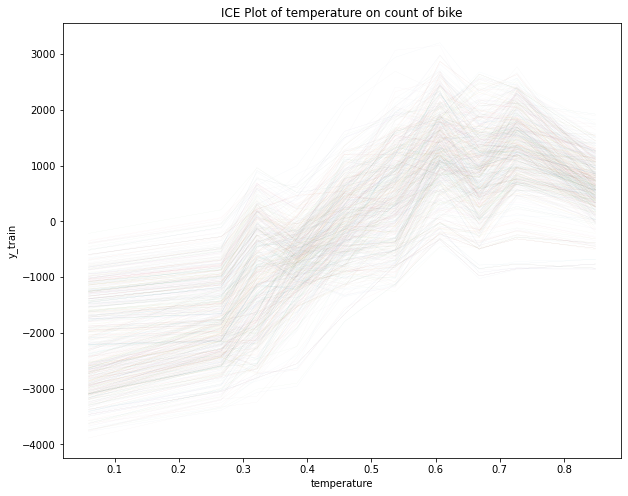

In [68]:
plt.rcParams['figure.figsize'] = 10,8
ice_plot(ice_df, linewidth = .15, cmap=PuOr, alpha = 0.1)

plt.ylabel('y_train')
plt.xlabel('temperature')
plt.title('ICE Plot of temperature on count of bike')
plt.show()

Text(0.5, 1.0, 'ICE Plot of temperature on count of bike')

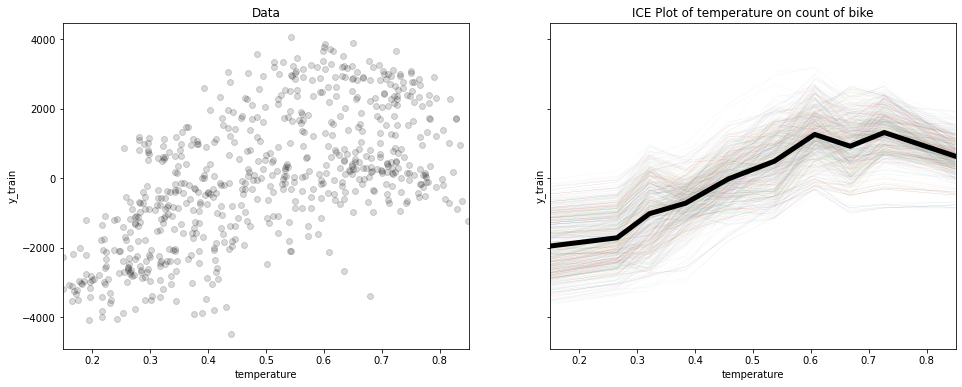

In [69]:
fig, (data_ax, ice_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))
data_ax.scatter(X_train.temperature, y_train, c='k', alpha=0.15)
data_ax.set_xlim(0.15, 0.85)
data_ax.set_xlabel('temperature')
data_ax.set_ylabel('y_train')
data_ax.set_title('Data')
ice_plot(ice_df, linewidth=0.25, cmap=PuOr, alpha = 0.1, ax = ice_ax , plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5})
ice_ax.set_xlabel('temperature')
ice_ax.set_ylabel('y_train')
ice_ax.set_title('ICE Plot of temperature on count of bike')